In [ ]:
#以下为四个算法  单个点异常检测示意图绘制

Isolation Forest Outlier Indices： (array([ 20,  21,  22, 112, 119, 131, 133, 143, 165, 181], dtype=int64),)


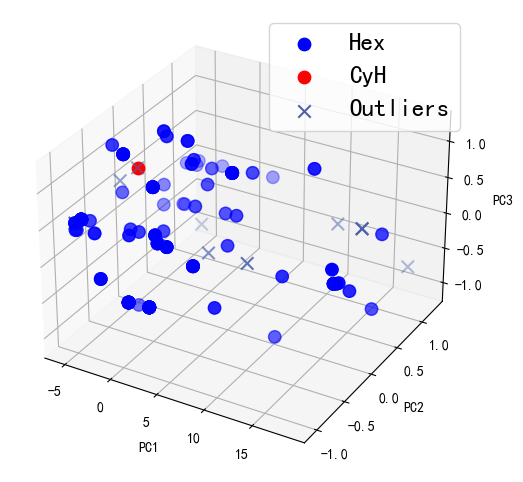

In [16]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import IsolationForest
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


data = pd.read_excel('Hex.xlsx')


features = data.iloc[:, :30]
labels = data['Class']  # 提取类别标签


clf = IsolationForest(contamination=0.05, random_state=42)


outlier_scores = clf.fit_predict(features)


outliers = np.where(outlier_scores == -1)


print("Isolation Forest Outlier Indices：", outliers)


pca = PCA(n_components=3)
features_3d = pca.fit_transform(features)


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# ax.grid(False)

# 正常点
normal_points = features_3d[outlier_scores == 1]
normal_labels = labels[outlier_scores == 1]
ax.scatter(normal_points[:, 0], normal_points[:, 1], normal_points[:, 2], label='Hex', color='b', s=80)
# 根据Class标签选择颜色
red_points = features_3d[labels == 0]
ax.scatter(red_points[:, 0], red_points[:, 1], red_points[:, 2], label='CyH', color='red', s=80)
# 异常点
outlier_points = features_3d[outlier_scores == -1]
outlier_labels = labels[outlier_scores == -1]
ax.scatter(outlier_points[:, 0], outlier_points[:, 1], outlier_points[:, 2], label='Outliers', color='#4e62ab', marker='x', s=80)



ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
#ax.set_title('Anomaly Detection', fontsize=15)
plt.legend()
ax.legend(prop={'size': 18})
plt.savefig('示意.png', bbox_inches='tight', dpi=600)
plt.show()


Z-Score 异常检测点索引: (array([181], dtype=int64),)


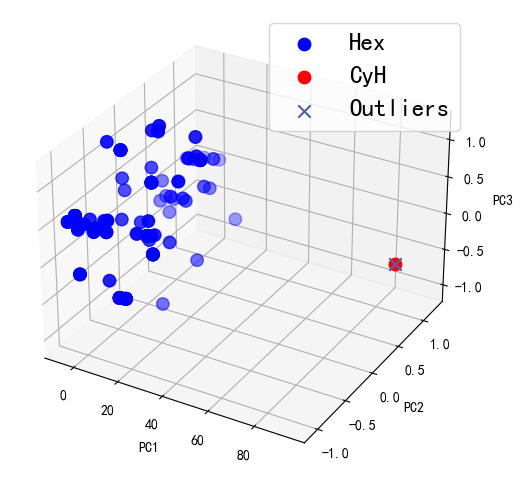

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

data = pd.read_excel('Hex.xlsx')

features = data.iloc[:, :30]

# 使用PCA将特征降维到三维
pca = PCA(n_components=3)
features_3d = pca.fit_transform(features)

# Z-Score 方法
z_scores = StandardScaler().fit_transform(features_3d)

# 找到异常点的索引
z_outliers_indices = np.where((np.abs(z_scores) > 3).any(axis=1))
z_outliers_indices = np.where((np.abs(z_scores) > 3).any(axis=1))
print("Z-Score 异常检测点索引:", z_outliers_indices)

# 绘制散点图
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# 绘制正常点
normal_points = features_3d[np.logical_not(np.isin(np.arange(len(features_3d)), z_outliers_indices))]
ax.scatter(normal_points[:, 0], normal_points[:, 1], normal_points[:, 2], label='Hex', color='blue', s=80)

# 绘制红色的点
red_points = features_3d[data['Class'] == 0]
ax.scatter(red_points[:, 0], red_points[:, 1], red_points[:, 2], label='CyH', color='red', s=80)

# 绘制异常点
outlier_points = features_3d[z_outliers_indices]
ax.scatter(outlier_points[:, 0], outlier_points[:, 1], outlier_points[:, 2], label='Outliers', color='#4e62ab', marker='x', s=80)


# 设置坐标轴和标题
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
#ax.set_title('', fontsize=15)

plt.legend()
ax.legend(prop={'size': 18})

plt.savefig('Z-score_Outliers.png', bbox_inches='tight', dpi=600)
plt.show()


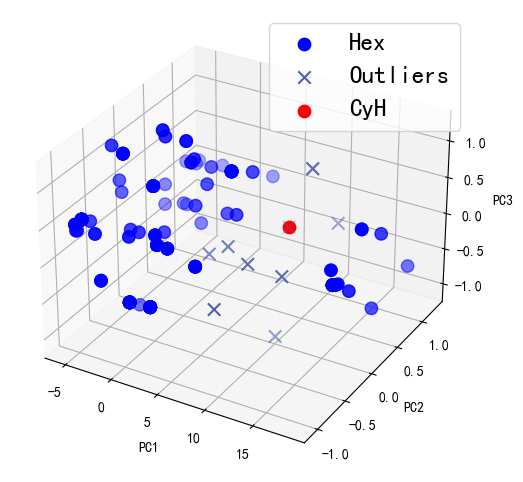

In [18]:
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

data = pd.read_excel('Hex.xlsx')

features = data.iloc[:, :30]

# 使用PCA将特征降维到三维
pca = PCA(n_components=3)
features_3d = pca.fit_transform(features)

# KNN 方法
knn = NearestNeighbors(n_neighbors=10)
knn.fit(features_3d)
knn_outlier_scores = knn.kneighbors(features_3d)[0][:, -1]
knn_threshold = np.percentile(knn_outlier_scores, 95)
knn_outliers_indices = np.where(knn_outlier_scores > knn_threshold)

# 绘制散点图
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# 绘制正常点
normal_points = features_3d[np.logical_not(np.isin(np.arange(len(features_3d)), knn_outliers_indices))]
ax.scatter(normal_points[:, 0], normal_points[:, 1], normal_points[:, 2], label='Hex', color='blue', s=80)

# 绘制异常点
outlier_points = features_3d[knn_outliers_indices]
ax.scatter(outlier_points[:, 0], outlier_points[:, 1], outlier_points[:, 2], label='Outliers', color='#4e62ab', marker='x', s=80)

# 绘制红色的点
red_points = features_3d[data['Class'] == 0]
ax.scatter(red_points[:, 0], red_points[:, 1], red_points[:, 2], label='CyH', color='red', s=80)

# 设置坐标轴和标题
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.legend()
ax.legend(prop={'size': 18})
plt.savefig('KNN_Outliers.png', bbox_inches='tight', dpi=600)
plt.show()


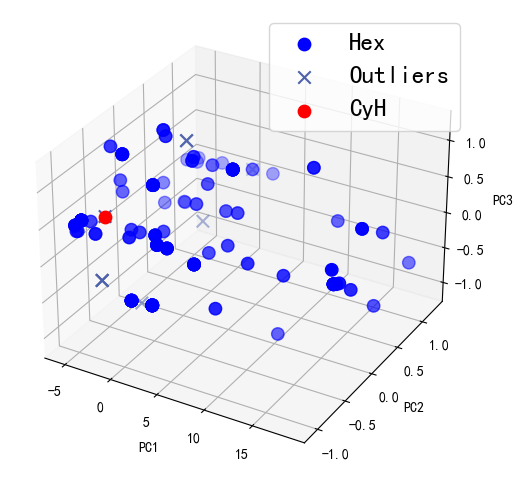

In [19]:
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

data = pd.read_excel('Hex.xlsx')

features = data.iloc[:, :30]

# 使用PCA将特征降维到三维
pca = PCA(n_components=3)
features_3d = pca.fit_transform(features)

# LOF 方法
lof = LocalOutlierFactor(n_neighbors=10, contamination=0.05)
lof_outlier_scores = lof.fit_predict(features_3d)
lof_outliers_indices = np.where(lof_outlier_scores == -1)

# 绘制散点图
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# 绘制正常点
normal_points = features_3d[np.logical_not(np.isin(np.arange(len(features_3d)), lof_outliers_indices))]
ax.scatter(normal_points[:, 0], normal_points[:, 1], normal_points[:, 2], label='Hex', color='blue', s=80)

# 绘制异常点
outlier_points = features_3d[lof_outliers_indices]
ax.scatter(outlier_points[:, 0], outlier_points[:, 1], outlier_points[:, 2], label='Outliers', color='#4e62ab', marker='x', s=80)

# 绘制红色的点
red_points = features_3d[data['Class'] == 0]
ax.scatter(red_points[:, 0], red_points[:, 1], red_points[:, 2], label='CyH', color='red', s=80)

# 设置坐标轴和标题
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
#ax.set_title('Anomaly Detection', fontsize=15)
plt.legend()
ax.legend(prop={'size': 18})
plt.savefig('LOF_Outliers.png', bbox_inches='tight', dpi=600)
plt.show()


In [ ]:
#以下两个代码分别为  IOF异常值计算 和剩余三个算法异常值计算

In [181]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import IsolationForest
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

data = pd.read_excel('Hex.xlsx')
features = data.iloc[:, :30]

clf = IsolationForest(contamination=0.05, random_state=42)
outlier_scores = clf.fit_predict(features)

outliers_indices = np.where(outlier_scores == -1)[0]

# 计算每个异常点的平均路径长度
apl_scores = np.zeros(len(features))
for i in range(len(features)):
    path_lengths = np.array([estimator.decision_path([features.iloc[i]])[0].toarray().sum() for estimator in clf.estimators_])
    apl_scores[i] = path_lengths.mean()

# 输出每个异常点的索引和对应的平均路径长度
for outlier_idx, apl_score in zip(outliers_indices, apl_scores[outliers_indices]):
    print(f"Outlier index: {outlier_idx}, Average Path Length: {apl_score}")

apl_score_181 = apl_scores[180]
print("Average Path Length for index 182:", apl_score_181)

Outlier index: 20, Average Path Length: 7.37
Outlier index: 21, Average Path Length: 7.37
Outlier index: 22, Average Path Length: 7.43
Outlier index: 112, Average Path Length: 6.83
Outlier index: 119, Average Path Length: 7.46
Outlier index: 121, Average Path Length: 7.58
Outlier index: 143, Average Path Length: 7.54
Outlier index: 159, Average Path Length: 7.43
Outlier index: 165, Average Path Length: 7.36
Outlier index: 181, Average Path Length: 6.58
Average Path Length for index 182: 8.35


In [182]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor, NearestNeighbors
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

data = pd.read_excel('Hex.xlsx')

features = data.iloc[:, :30]

# 使用PCA将特征降维到三维
pca = PCA(n_components=3)
features_3d = pca.fit_transform(features)

# Z-Score 方法
z_scores = StandardScaler().fit_transform(features_3d)
z_max_scores = np.abs(z_scores).max(axis=1)
z_outliers = np.where(z_max_scores > 3)
print("Z-Score 异常检测点索引:", z_outliers)

# LOF 方法

lof = LocalOutlierFactor(n_neighbors=10, contamination=0.05)
lof_outlier_scores = lof.fit_predict(features_3d)
lof_outliers = np.where(lof_outlier_scores == -1)
print("LOF 异常检测点索引:", lof_outliers)

# KNN 方法
knn = NearestNeighbors(n_neighbors=10)
knn.fit(features_3d)
knn_outlier_scores = knn.kneighbors(features_3d)[0][:, -1]
knn_threshold = np.percentile(knn_outlier_scores, 95)
knn_outliers = np.where(knn_outlier_scores > knn_threshold)
print("KNN 异常检测点索引:", knn_outliers)

# 输出异常值
print("Z-Score 异常值:", z_scores[z_outliers])
print("LOF 异常值:", lof_outlier_scores[lof_outliers])
print("KNN 异常值:", knn_outlier_scores[knn_outliers])

Z-Score 异常检测点索引: (array([], dtype=int64),)
LOF 异常检测点索引: (array([  0,   2,  11,  12,  13,  14, 143, 146, 147, 148], dtype=int64),)
KNN 异常检测点索引: (array([  6,  38, 112, 119, 124, 133, 156, 158, 159, 181], dtype=int64),)
Z-Score 异常值: []
LOF 异常值: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
KNN 异常值: [6.04999572 6.02532502 6.02534668 4.99423174 3.98169009 2.07084984
 6.10626391 6.10626391 4.23963104 4.18763148]
